In [103]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Data

In [104]:
df = pd.read_csv('../output/csv/lol-data-matches-fixed-duration.csv').drop(columns=['Unnamed: 0'])
df1 = pd.read_csv('../output/csv/lol-data-match-frames.csv').drop(columns=['Unnamed: 0'])
blue, red = -1, 1
frame = 15
random_state = 0
df1 = df1[df1['frame'] == frame]
print('Number of duplicate data points in lol-data-matches-fixed-duration.csv: '
     + str(df.duplicated(subset=['match_id']).sum()))
print('Number of duplicate data points in lol-data-match-frames.csv: '
     + str(df1.duplicated(subset=['match_id']).sum()))
df.drop_duplicates(subset=['match_id'], inplace=True)
df1.drop_duplicates(subset=['match_id'], inplace=True)
df = pd.merge(df1, df, on='match_id')
print('Number of data points with missing features: ')
for f in df.columns[df.isna().any()].tolist():
    print(f + ': ' + str(df.loc[df[f].isna()].shape[0]))
df.dropna(subset=['winning_team'], inplace=True)
print('Initial set of features:\n', df.columns.tolist())
print('Initial class distribution:\nBlue:' + '%.2f%%' % ((df.groupby('winning_team').size().tolist()[0]/df.shape[0])*100)
      + '\nRed:' + '%.2f%%' % ((df.groupby('winning_team').size().tolist()[1]/df.shape[0])*100))
print('Initial tier distribution: \nBronze: ', df.groupby('tier').size().tolist()[0],
     '\nGold:', df.groupby('tier').size().tolist()[1], '\nDiamond:', df.groupby('tier').size().tolist()[2],
     '\nGrandmaster:', df.groupby('tier').size().tolist()[3])
df.describe()

Number of duplicate data points in lol-data-matches-fixed-duration.csv: 80
Number of duplicate data points in lol-data-match-frames.csv: 0
Number of data points with missing features: 
winning_team: 2
first_champion: 119
first_tower: 23
first_inhibitor: 4597
first_baron: 11269
first_dragon: 80
first_rift_herald: 2490
Initial set of features:
 ['match_id', 'frame', 'blue_total_kills', 'blue_total_gold', 'blue_total_cs', 'blue_total_damage', 'blue_towers', 'blue_plates', 'blue_inhibitors', 'blue_barons', 'blue_dragons', 'blue_rift_heralds', 'red_total_kills', 'red_total_gold', 'red_total_cs', 'red_total_damage', 'red_towers', 'red_plates', 'red_inhibitors', 'red_barons', 'red_dragons', 'red_rift_heralds', 'tier', 'division', 'patch', 'game_duration', 'region', 'winning_team', 'first_champion', 'first_tower', 'first_inhibitor', 'first_baron', 'first_dragon', 'first_rift_herald']
Initial class distribution:
Blue:50.57%
Red:49.43%
Initial tier distribution: 
Bronze:  10984 
Gold: 9563 
Diam

,frame,blue_total_kills,blue_total_gold,blue_total_cs,blue_total_damage,blue_towers,blue_plates,blue_inhibitors,blue_barons,blue_dragons,...,red_rift_heralds,patch,game_duration,winning_team,first_champion,first_tower,first_inhibitor,first_baron,first_dragon,first_rift_herald
count,35560.0,35560.000000,35560.000000,35560.000000,35560.00000,35560.000000,35560.000000,35560.000000,35560.0,35560.000000,...,35560.000000,35560.000000,35560.000000,35560.000000,35441.000000,35537.000000,30963.000000,24292.000000,35480.000000,33070.000000
mean,15.0,11.056412,26295.002700,391.234674,26365.56018,0.479556,6.009308,0.001490,0.0,0.646682,...,0.336474,11.231027,1724.085742,149.431946,149.346802,148.718237,148.796951,151.473736,151.834837,146.368310
std,0.0,4.464712,3143.540154,55.201427,5359.20093,0.777889,3.365281,0.043382,0.0,0.672691,...,0.472510,0.175847,402.616937,49.997476,49.996438,49.984271,49.986332,49.979305,49.967027,49.868688
min,15.0,0.000000,14651.000000,145.000000,7603.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,10.250000,840.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
25%,15.0,8.000000,24125.000000,354.000000,22666.00000,0.000000,3.000000,0.000000,0.0,0.000000,...,0.000000,11.180000,1436.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
50%,15.0,11.000000,26158.000000,396.000000,26114.00000,0.000000,6.000000,0.000000,0.0,1.000000,...,0.000000,11.210000,1702.000000,100.000000,100.000000,100.000000,100.000000,200.000000,200.000000,100.000000
75%,15.0,14.000000,28291.000000,431.000000,29778.00000,1.000000,8.000000,0.000000,0.0,1.000000,...,1.000000,11.210000,1979.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
max,15.0,36.000000,40225.000000,599.000000,57894.00000,9.000000,15.000000,3.000000,0.0,2.000000,...,1.000000,11.900000,3649.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000


## Data Preprocessing

### Sampling

In [105]:
bronze = df[df['tier'] == 'BRONZE'].sample(7000, random_state=random_state)
gold = df[df['tier'] == 'GOLD'].sample(7000, random_state=random_state)
diamond = df[df['tier'] == 'DIAMOND'].sample(7000, random_state=random_state)
gm = df[df['tier'] == 'GRANDMASTERS'].sample(7000, random_state=random_state)
df = bronze.append([gold, diamond, gm])
print('Sample class distribution:\nBlue:' + '%.2f%%' % ((df.groupby('winning_team').size().tolist()[0]/df.shape[0])*100)
      + '\nRed:' + '%.2f%%' % ((df.groupby('winning_team').size().tolist()[1]/df.shape[0])*100))

Sample class distribution:
Blue:50.25%
Red:49.75%


### Data Cleaning and Formatting

In [106]:
df.drop(columns=['match_id', 'frame', 'division', 'patch', 'region'], inplace=True)
if frame < 5:
    df.drop(columns=['red_dragons', 'blue_dragons', 'red_inhibitors',
                     'blue_inhibitors', 'red_rift_heralds', 'blue_rift_heralds'], inplace=True)
if frame < 20:
    df.drop(columns=['red_barons', 'blue_barons'], inplace=True)
df.replace({200: red, 100: blue, np.nan:0}, inplace=True)
df.rename(columns={'winning_team': 'winner', 'first_champion':'first_kill'}, inplace=True)
print('Set of features after removing irrelevant features and renaming:\n', df.columns.tolist())

Set of features after removing irrelevant features and renaming:
 ['blue_total_kills', 'blue_total_gold', 'blue_total_cs', 'blue_total_damage', 'blue_towers', 'blue_plates', 'blue_inhibitors', 'blue_dragons', 'blue_rift_heralds', 'red_total_kills', 'red_total_gold', 'red_total_cs', 'red_total_damage', 'red_towers', 'red_plates', 'red_inhibitors', 'red_dragons', 'red_rift_heralds', 'tier', 'game_duration', 'winner', 'first_kill', 'first_tower', 'first_inhibitor', 'first_baron', 'first_dragon', 'first_rift_herald']


### Feature Transformation

#### Binary

In [107]:
df_bi = df.copy(deep=True)
df_bi['kill_advantage'] = np.where(df_bi['red_total_kills'] == df_bi['blue_total_kills'], 0, 
                        np.where(df_bi['red_total_kills'] > df_bi['blue_total_kills'], red, blue))
df_bi.drop(columns=['red_total_kills', 'blue_total_kills'], inplace=True)
df_bi['gold_advantage'] = np.where(df_bi['red_total_gold'] == df_bi['blue_total_gold'], 0,
                        np.where(df_bi['red_total_gold'] > df_bi['blue_total_gold'], red, blue))
df_bi.drop(columns=['red_total_gold', 'blue_total_gold'], inplace=True)
df_bi['cs_advantage'] = np.where(df_bi['red_total_cs'] == df_bi['blue_total_cs'], 0,
                        np.where(df_bi['red_total_cs'] > df_bi['blue_total_cs'], red, blue))
df_bi.drop(columns=['red_total_cs', 'blue_total_cs'], inplace=True)
df_bi['damage_advantage'] = np.where(df_bi['red_total_damage'] == df_bi['blue_total_damage'], 0,
                        np.where(df_bi['red_total_damage'] > df_bi['blue_total_damage'], red, blue))
df_bi.drop(columns=['red_total_damage', 'blue_total_damage'], inplace=True)
df_bi['tower_advantage'] = np.where(df_bi['red_towers'] == df_bi['blue_towers'], 0,
                        np.where(df_bi['red_towers'] > df_bi['blue_towers'], red, blue))
df_bi.drop(columns=['red_towers', 'blue_towers'], inplace=True)
df_bi['plate_advantage'] = np.where(df_bi['red_plates'] == df_bi['blue_plates'],0, 
                        np.where(df_bi['red_plates'] > df_bi['blue_plates'], red, blue))
df_bi.drop(columns=['red_plates', 'blue_plates'], inplace=True)
if frame > 5:
    df_bi['inhibitor_advantage'] = np.where(df_bi['red_inhibitors'] == df_bi['blue_inhibitors'], 0, 
                            np.where(df_bi['red_inhibitors'] > df_bi['blue_inhibitors'], red, blue))
    df_bi.drop(columns=['red_inhibitors', 'blue_inhibitors'], inplace=True)
    df_bi['dragon_advantage'] = np.where(df_bi['red_dragons'] == df_bi['blue_dragons'], 0,
                            np.where(df_bi['red_dragons'] > df_bi['blue_dragons'], red, blue))
    df_bi.drop(columns=['red_dragons', 'blue_dragons'], inplace=True)
    df_bi['rift_advantage'] = np.where(df_bi['red_rift_heralds'] == df_bi['blue_rift_heralds'], 0,
                            np.where(df_bi['red_rift_heralds'] > df_bi['blue_rift_heralds'], red, blue))
    df_bi.drop(columns=['red_rift_heralds', 'blue_rift_heralds'], inplace=True)
if frame > 20:
    df_bi['baron_advantage'] = np.where(df_bi['red_barons'] == df_bi['blue_barons'],0, 
                            np.where(df_bi['red_barons'] > df_bi['blue_barons'], red, blue))
    df_bi.drop(columns=['red_barons', 'blue_barons'], inplace=True)
print('Set of features after binary feature transformation:\n', df_bi.columns.tolist())

Set of features after binary feature transformation:
 ['tier', 'game_duration', 'winner', 'first_kill', 'first_tower', 'first_inhibitor', 'first_baron', 'first_dragon', 'first_rift_herald', 'kill_advantage', 'gold_advantage', 'cs_advantage', 'damage_advantage', 'tower_advantage', 'plate_advantage', 'inhibitor_advantage', 'dragon_advantage', 'rift_advantage']


#### Difference

In [108]:
df_diff = df.copy(deep=True)
df_diff['kill_advantage'] = df_diff['red_total_kills'] - df_diff['blue_total_kills']
df_diff.drop(columns=['red_total_kills', 'blue_total_kills'], inplace=True)
df_diff['gold_advantage'] = df_diff['red_total_gold'] - df_diff['blue_total_gold']
df_diff.drop(columns=['red_total_gold', 'blue_total_gold'], inplace=True)
df_diff['cs_advantage'] = df_diff['red_total_cs'] - df_diff['blue_total_cs']
df_diff.drop(columns=['red_total_cs', 'blue_total_cs'], inplace=True)
df_diff['damage_advantage'] = df_diff['red_total_damage'] - df_diff['blue_total_damage']
df_diff.drop(columns=['red_total_damage', 'blue_total_damage'], inplace=True)
df_diff['tower_advantage'] = df_diff['red_towers'] - df_diff['blue_towers']
df_diff.drop(columns=['red_towers', 'blue_towers'], inplace=True)
df_diff['plate_advantage'] = df_diff['red_plates'] - df_diff['blue_plates']
df_diff.drop(columns=['red_plates', 'blue_plates'], inplace=True)
if frame > 5:
    df_diff['inhibitor_advantage'] = df_diff['red_inhibitors'] - df_diff['blue_inhibitors']
    df_diff.drop(columns=['red_inhibitors', 'blue_inhibitors'], inplace=True)
    df_diff['dragon_advantage'] = df_diff['red_dragons'] - df_diff['blue_dragons']
    df_diff.drop(columns=['red_dragons', 'blue_dragons'], inplace=True)
    df_diff['rift_advantage'] = df_diff['red_rift_heralds'] - df_diff['blue_rift_heralds']
    df_diff.drop(columns=['red_rift_heralds', 'blue_rift_heralds'], inplace=True)
if frame > 20:
    df_diff['baron_advantage'] = df_diff['red_barons'] - df_diff['blue_barons']
    df_diff.drop(columns=['red_barons', 'blue_barons'], inplace=True)
print('Set of features after difference feature transformation:\n', df_diff.columns.tolist())

Set of features after difference feature transformation:
 ['tier', 'game_duration', 'winner', 'first_kill', 'first_tower', 'first_inhibitor', 'first_baron', 'first_dragon', 'first_rift_herald', 'kill_advantage', 'gold_advantage', 'cs_advantage', 'damage_advantage', 'tower_advantage', 'plate_advantage', 'inhibitor_advantage', 'dragon_advantage', 'rift_advantage']


## Feature Importance Analysis

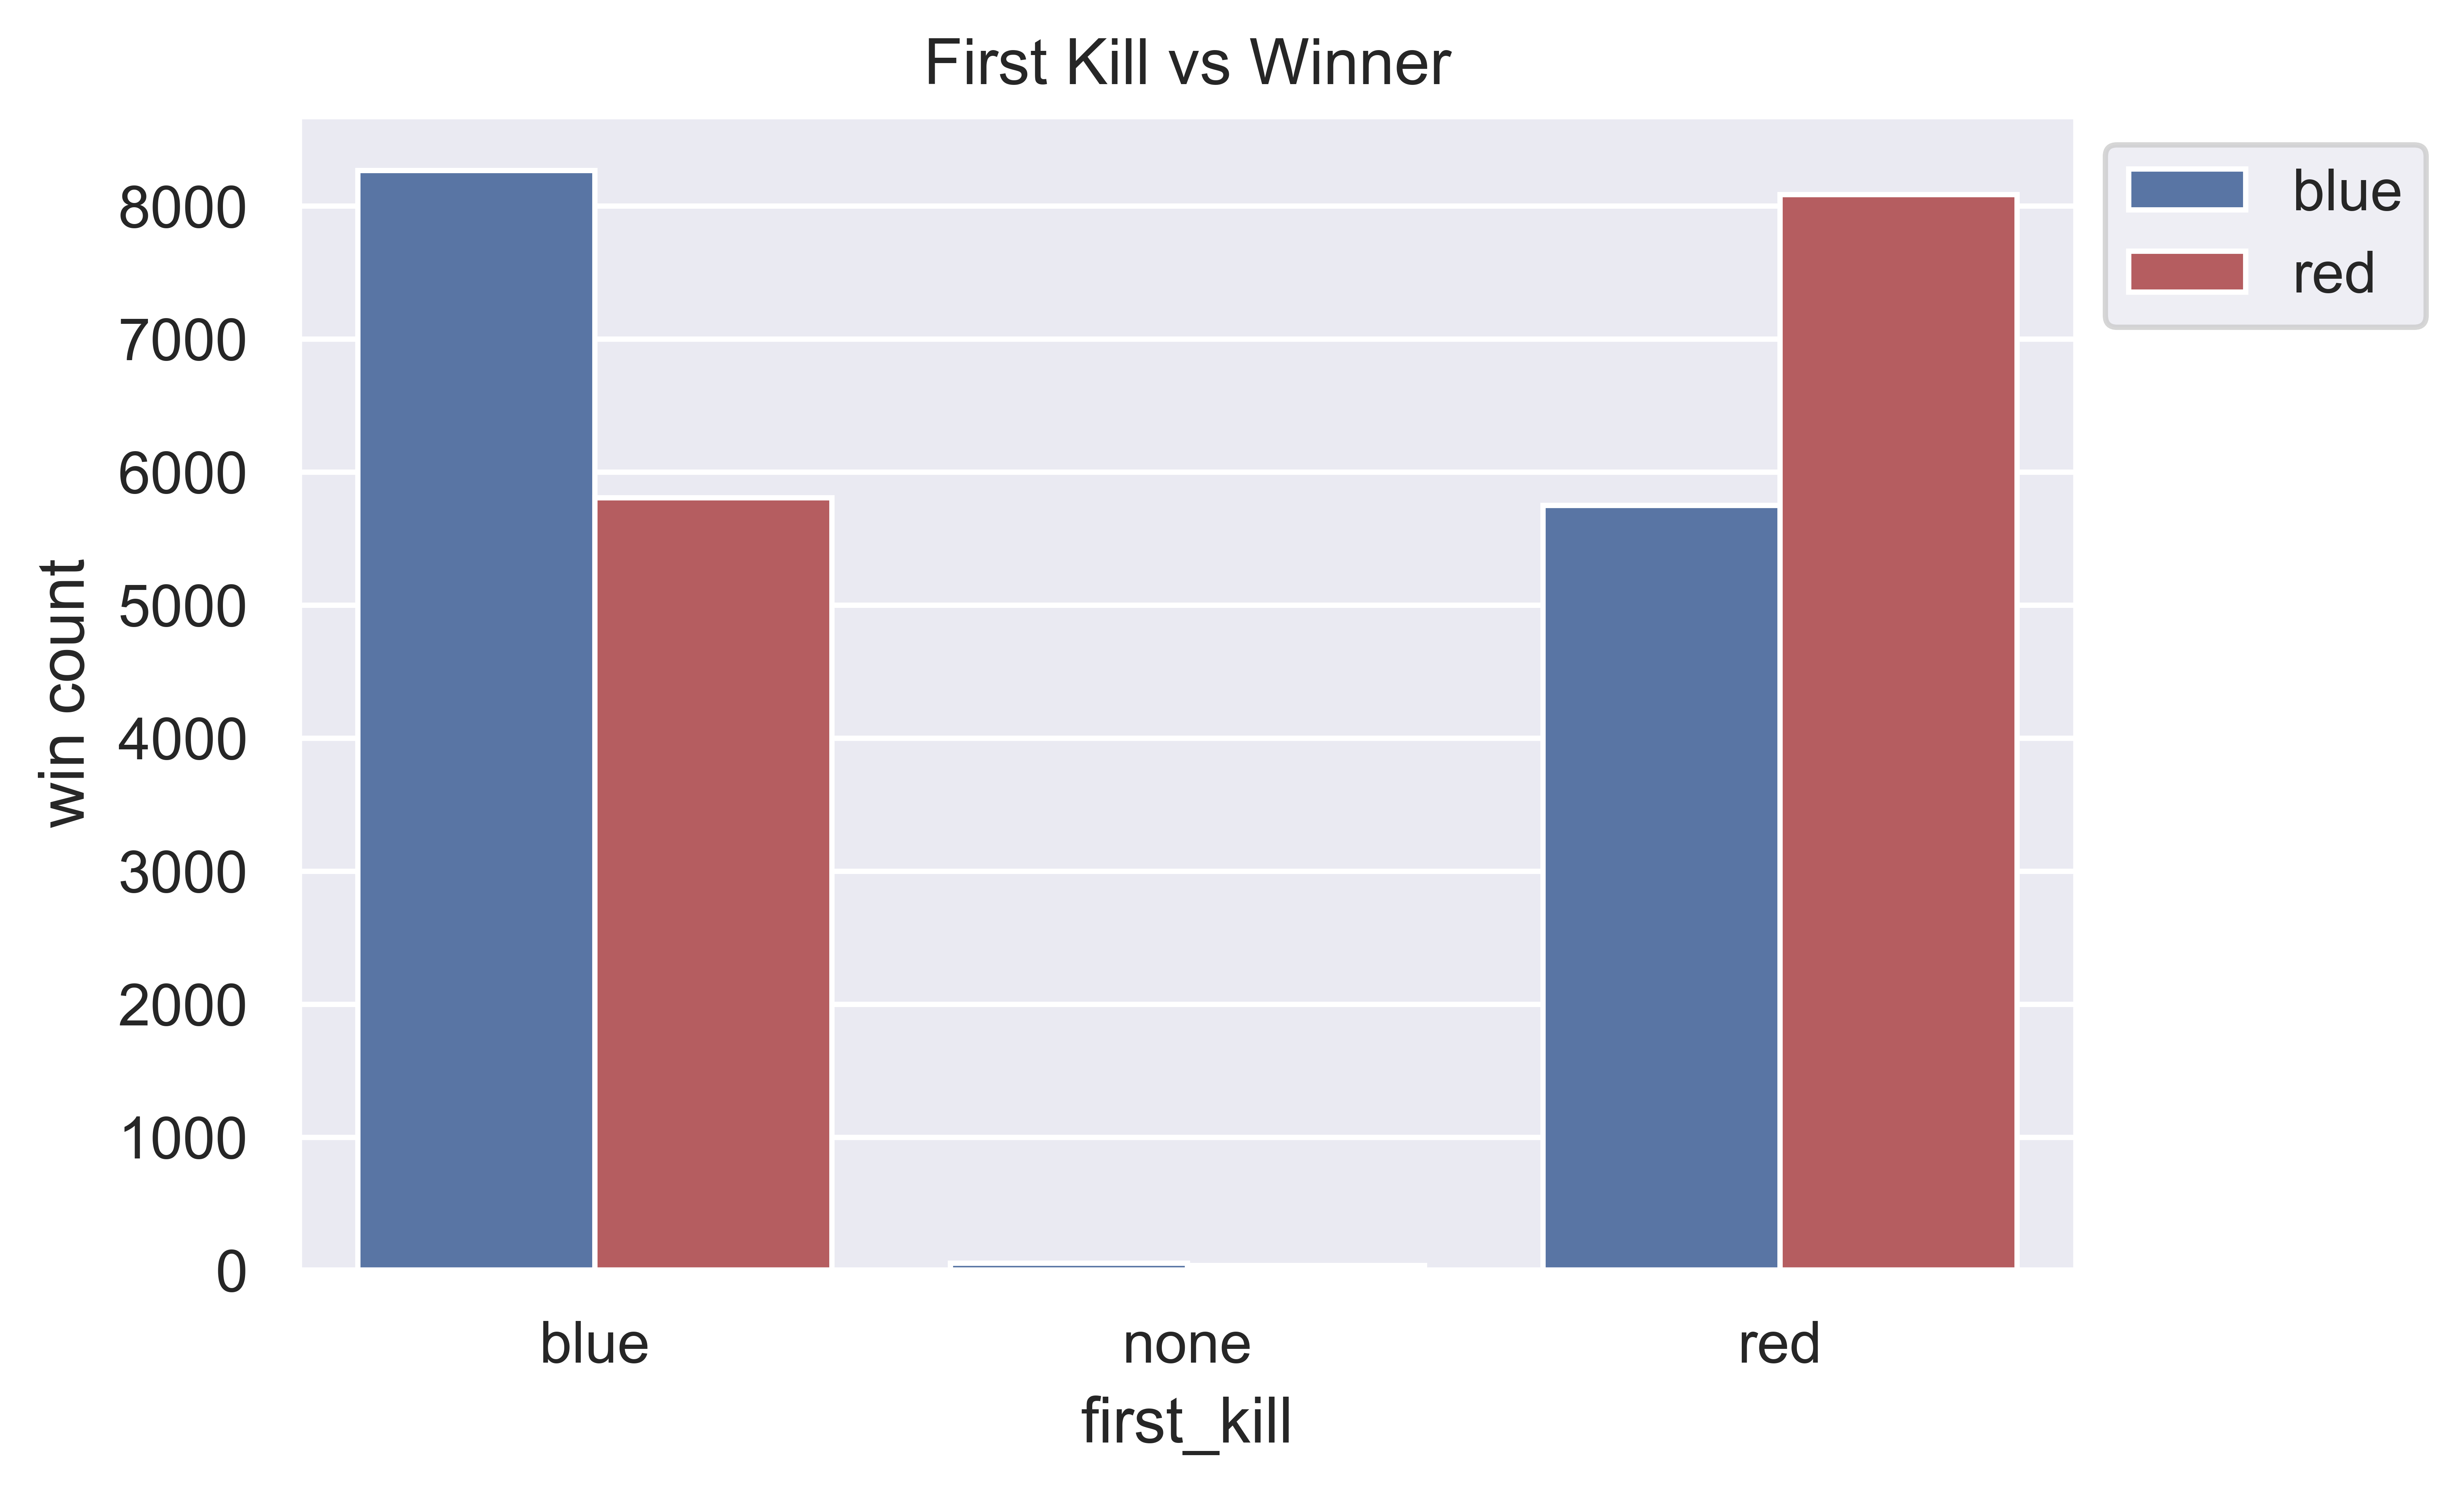

In [134]:
plt.figure(dpi=1000)
p = sns.countplot(x='first_kill', hue='winner', data=df.replace({-1:'blue', 0:'none', 1:'red'}),
                  order=['blue', 'none', 'red'], palette=['b', 'r'])
plt.title('First Kill vs Winner')
plt.ylabel('win count')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc='upper left')
plt.show(p)

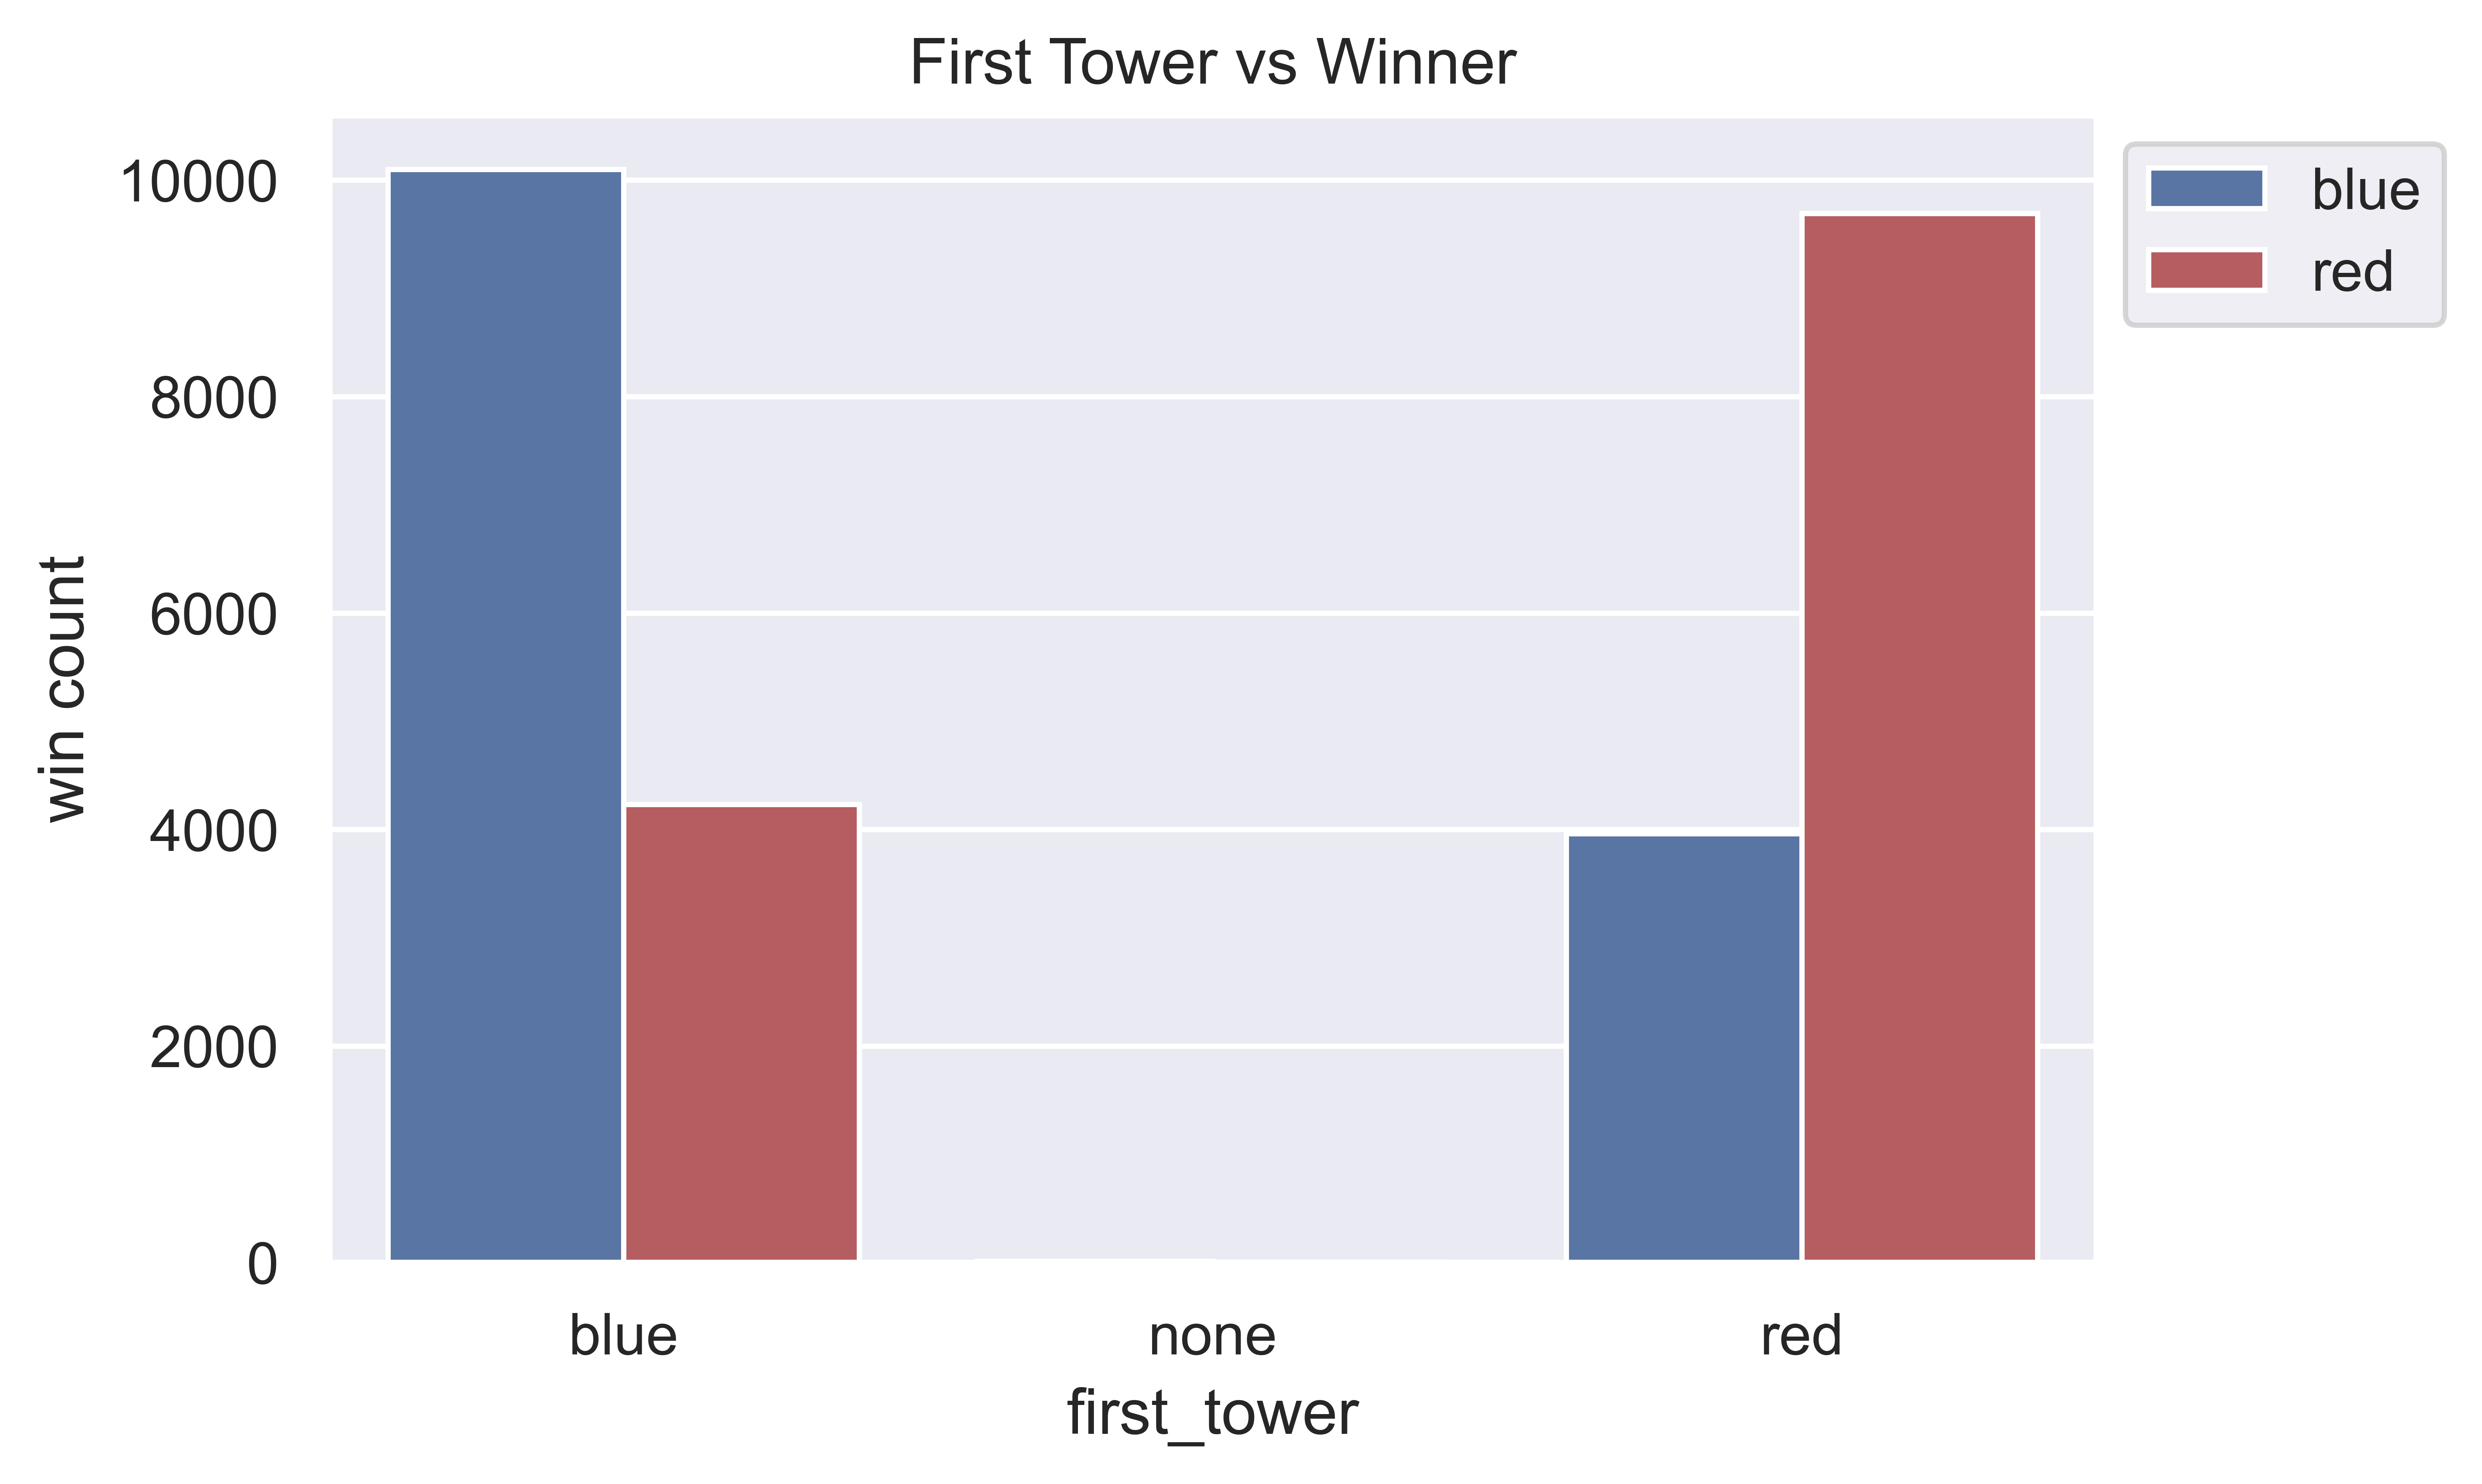

In [136]:
plt.figure(dpi=1000)
p = sns.countplot(x='first_tower', hue='winner', data=df.replace({-1:'blue', 0:'none', 1:'red'}),
                  order=['blue', 'none', 'red'], palette=['b', 'r'])
plt.title('First Tower vs Winner')
plt.ylabel('win count')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc='upper left')
plt.show(p)

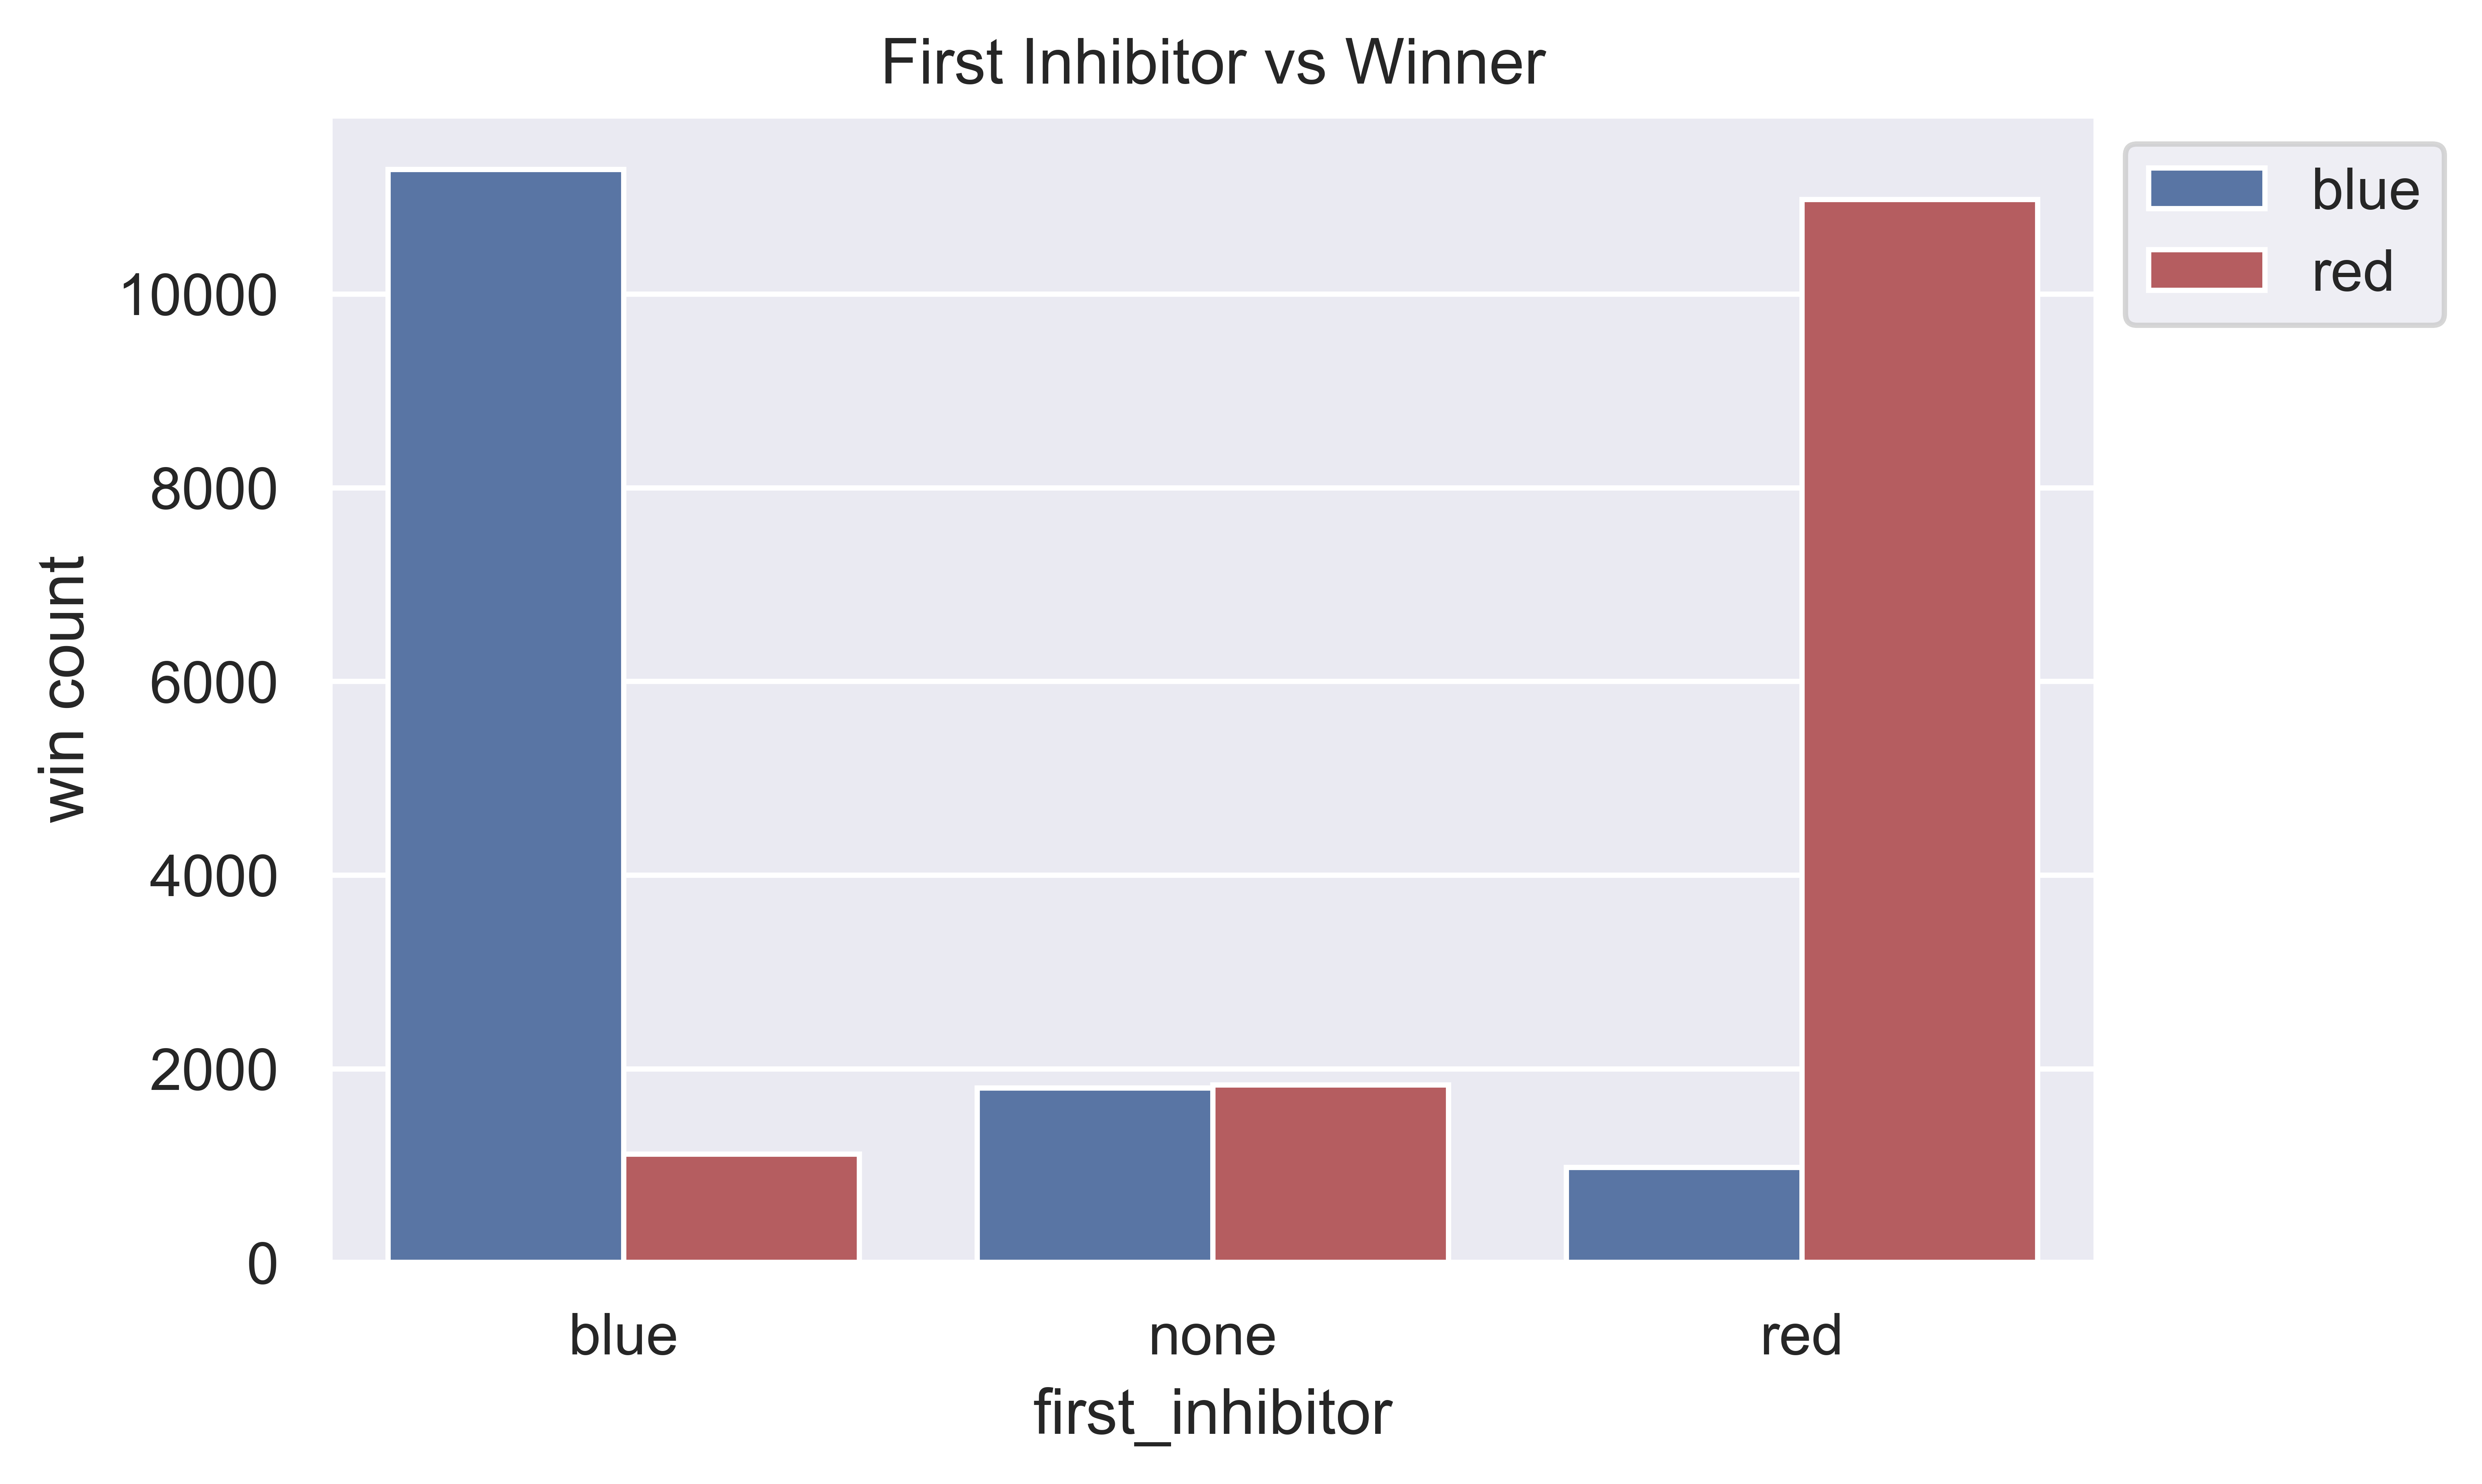

In [138]:
plt.figure(dpi=1000)
p = sns.countplot(x='first_inhibitor', hue='winner', data=df.replace({-1:'blue', 0:'none', 1:'red'}),
                  order=['blue', 'none', 'red'], palette=['b', 'r'])
plt.title('First Inhibitor vs Winner')
plt.ylabel('win count')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc='upper left')
plt.show(p)

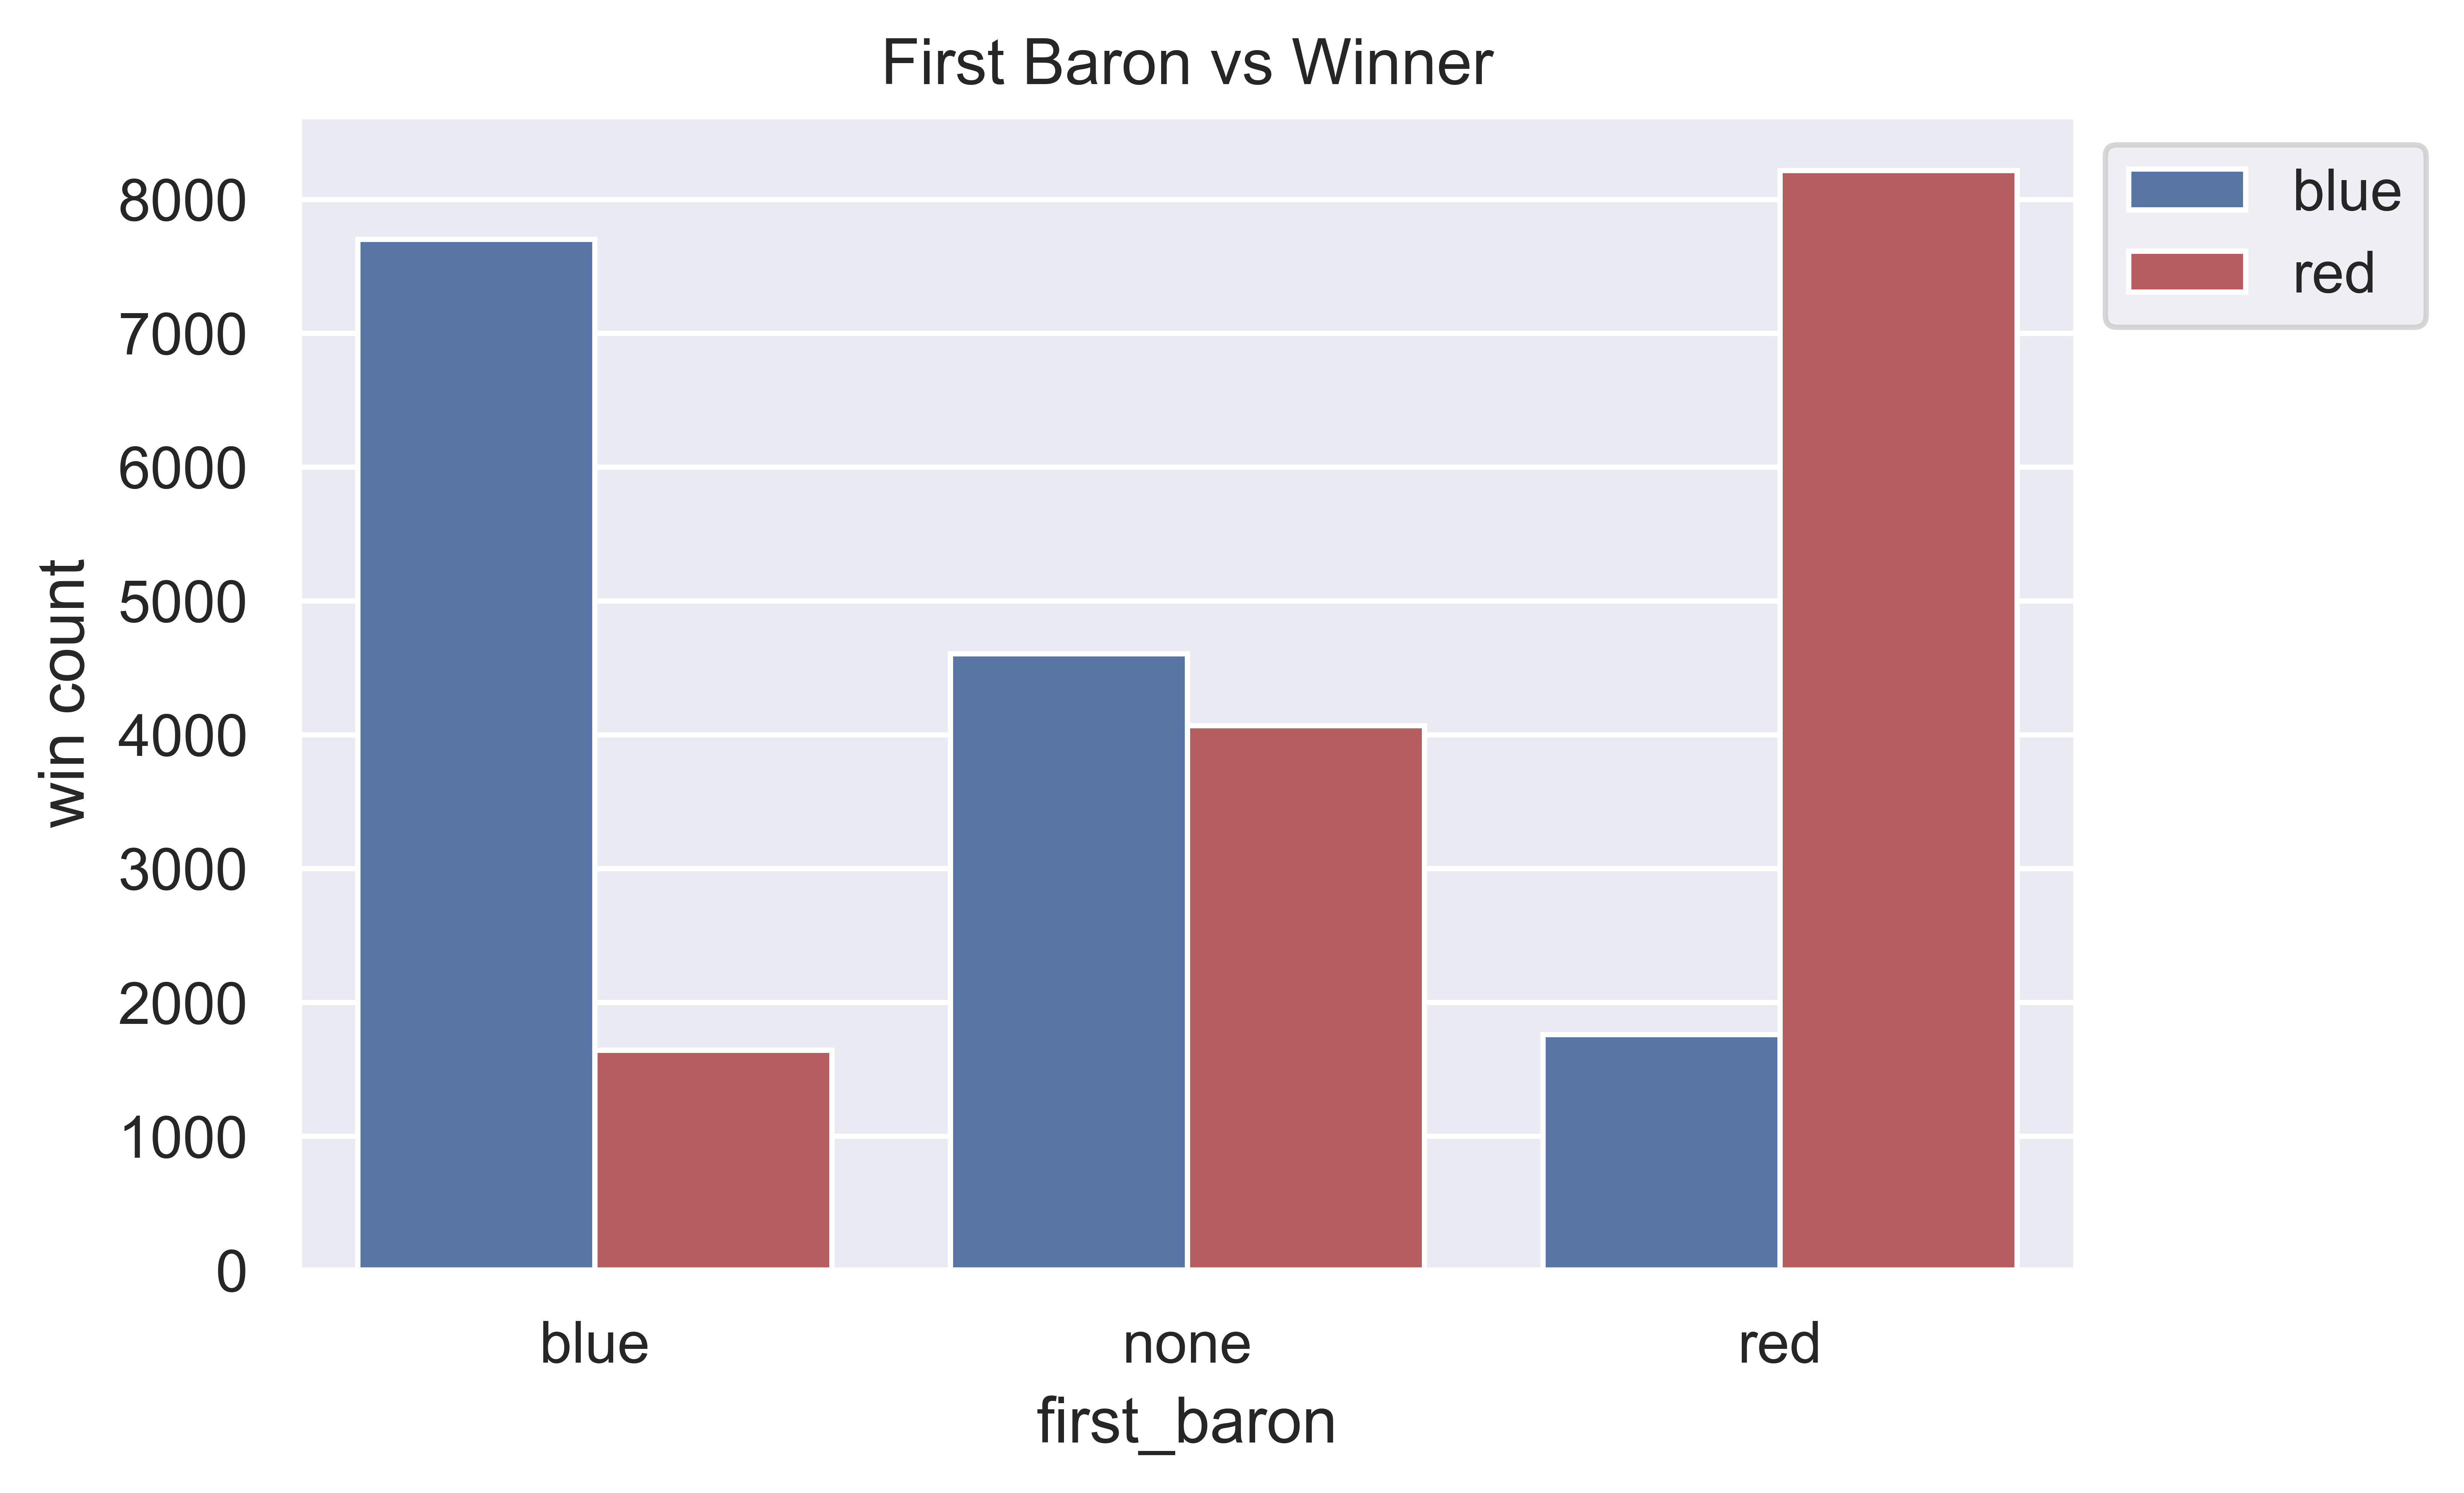

In [139]:
plt.figure(dpi=1000)
p = sns.countplot(x='first_baron', hue='winner', data=df.replace({-1:'blue', 0:'none', 1:'red'}),
                  order=['blue', 'none', 'red'], palette=['b', 'r'])
plt.title('First Baron vs Winner')
plt.ylabel('win count')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc='upper left')
plt.show(p)

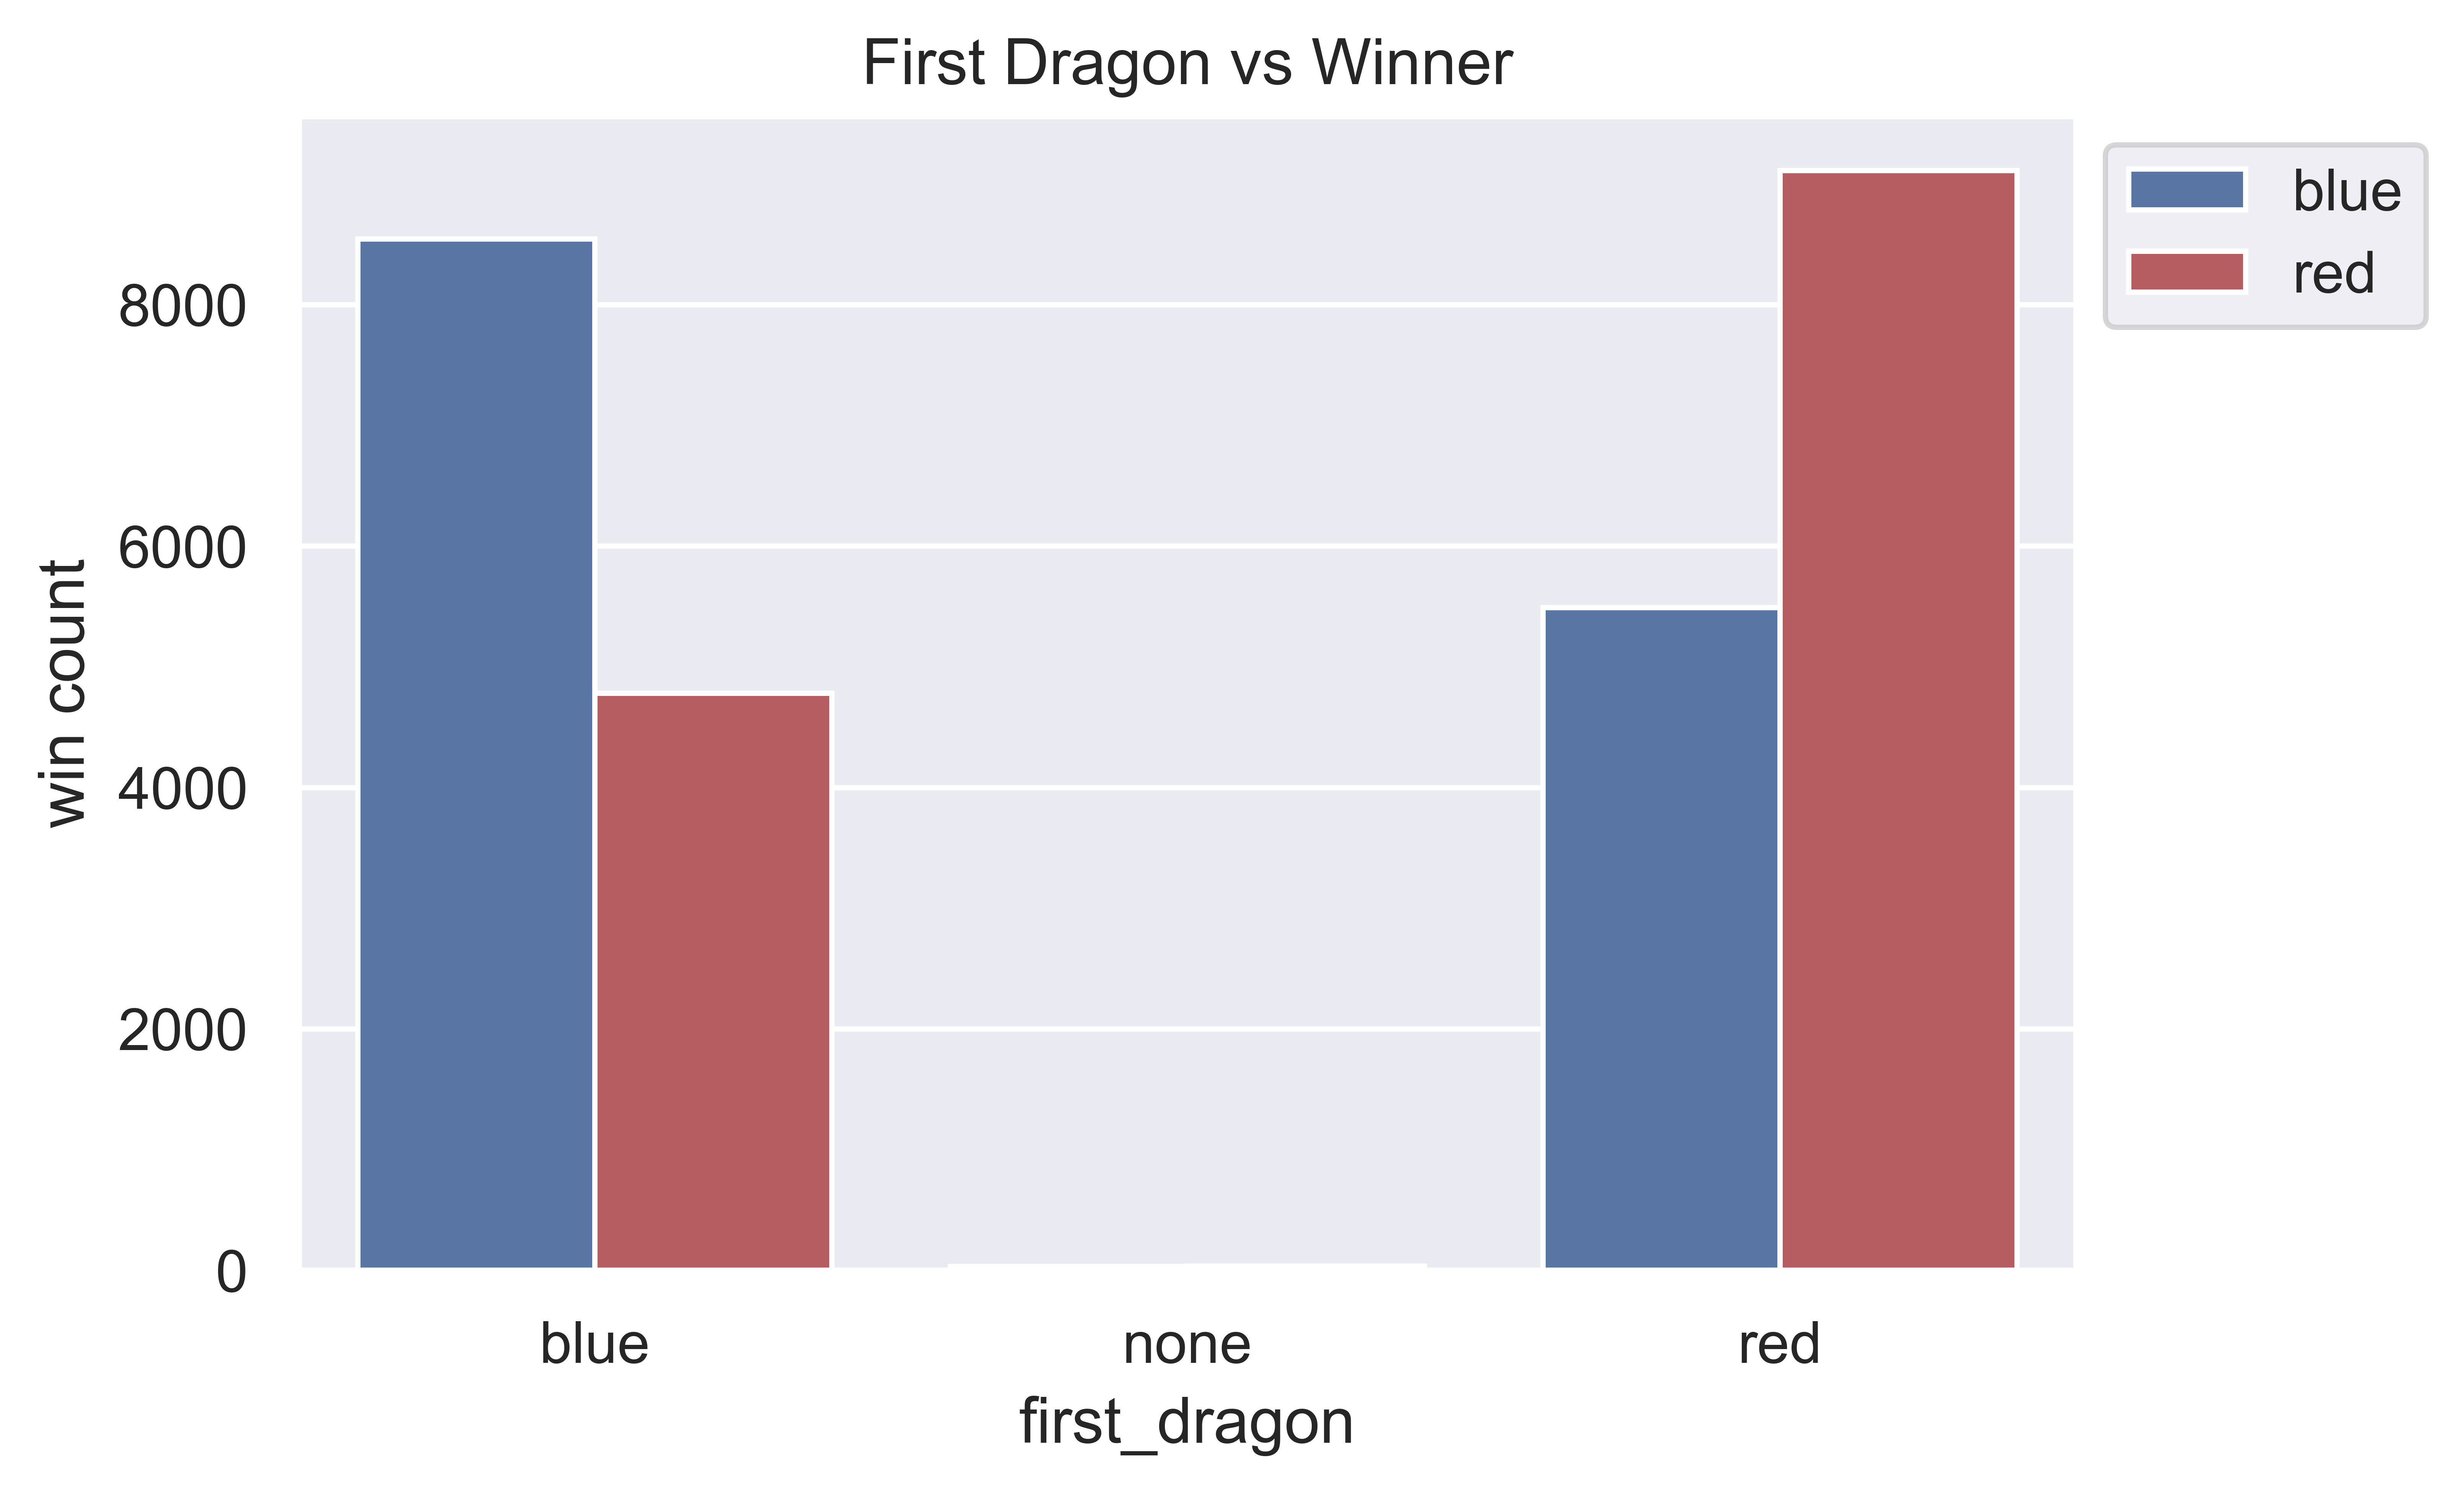

In [140]:
plt.figure(dpi=1000)
p = sns.countplot(x='first_dragon', hue='winner', data=df.replace({-1:'blue', 0:'none', 1:'red'}),
                  order=['blue', 'none', 'red'], palette=['b', 'r'])
plt.title('First Dragon vs Winner')
plt.ylabel('win count')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc='upper left')
plt.show(p)

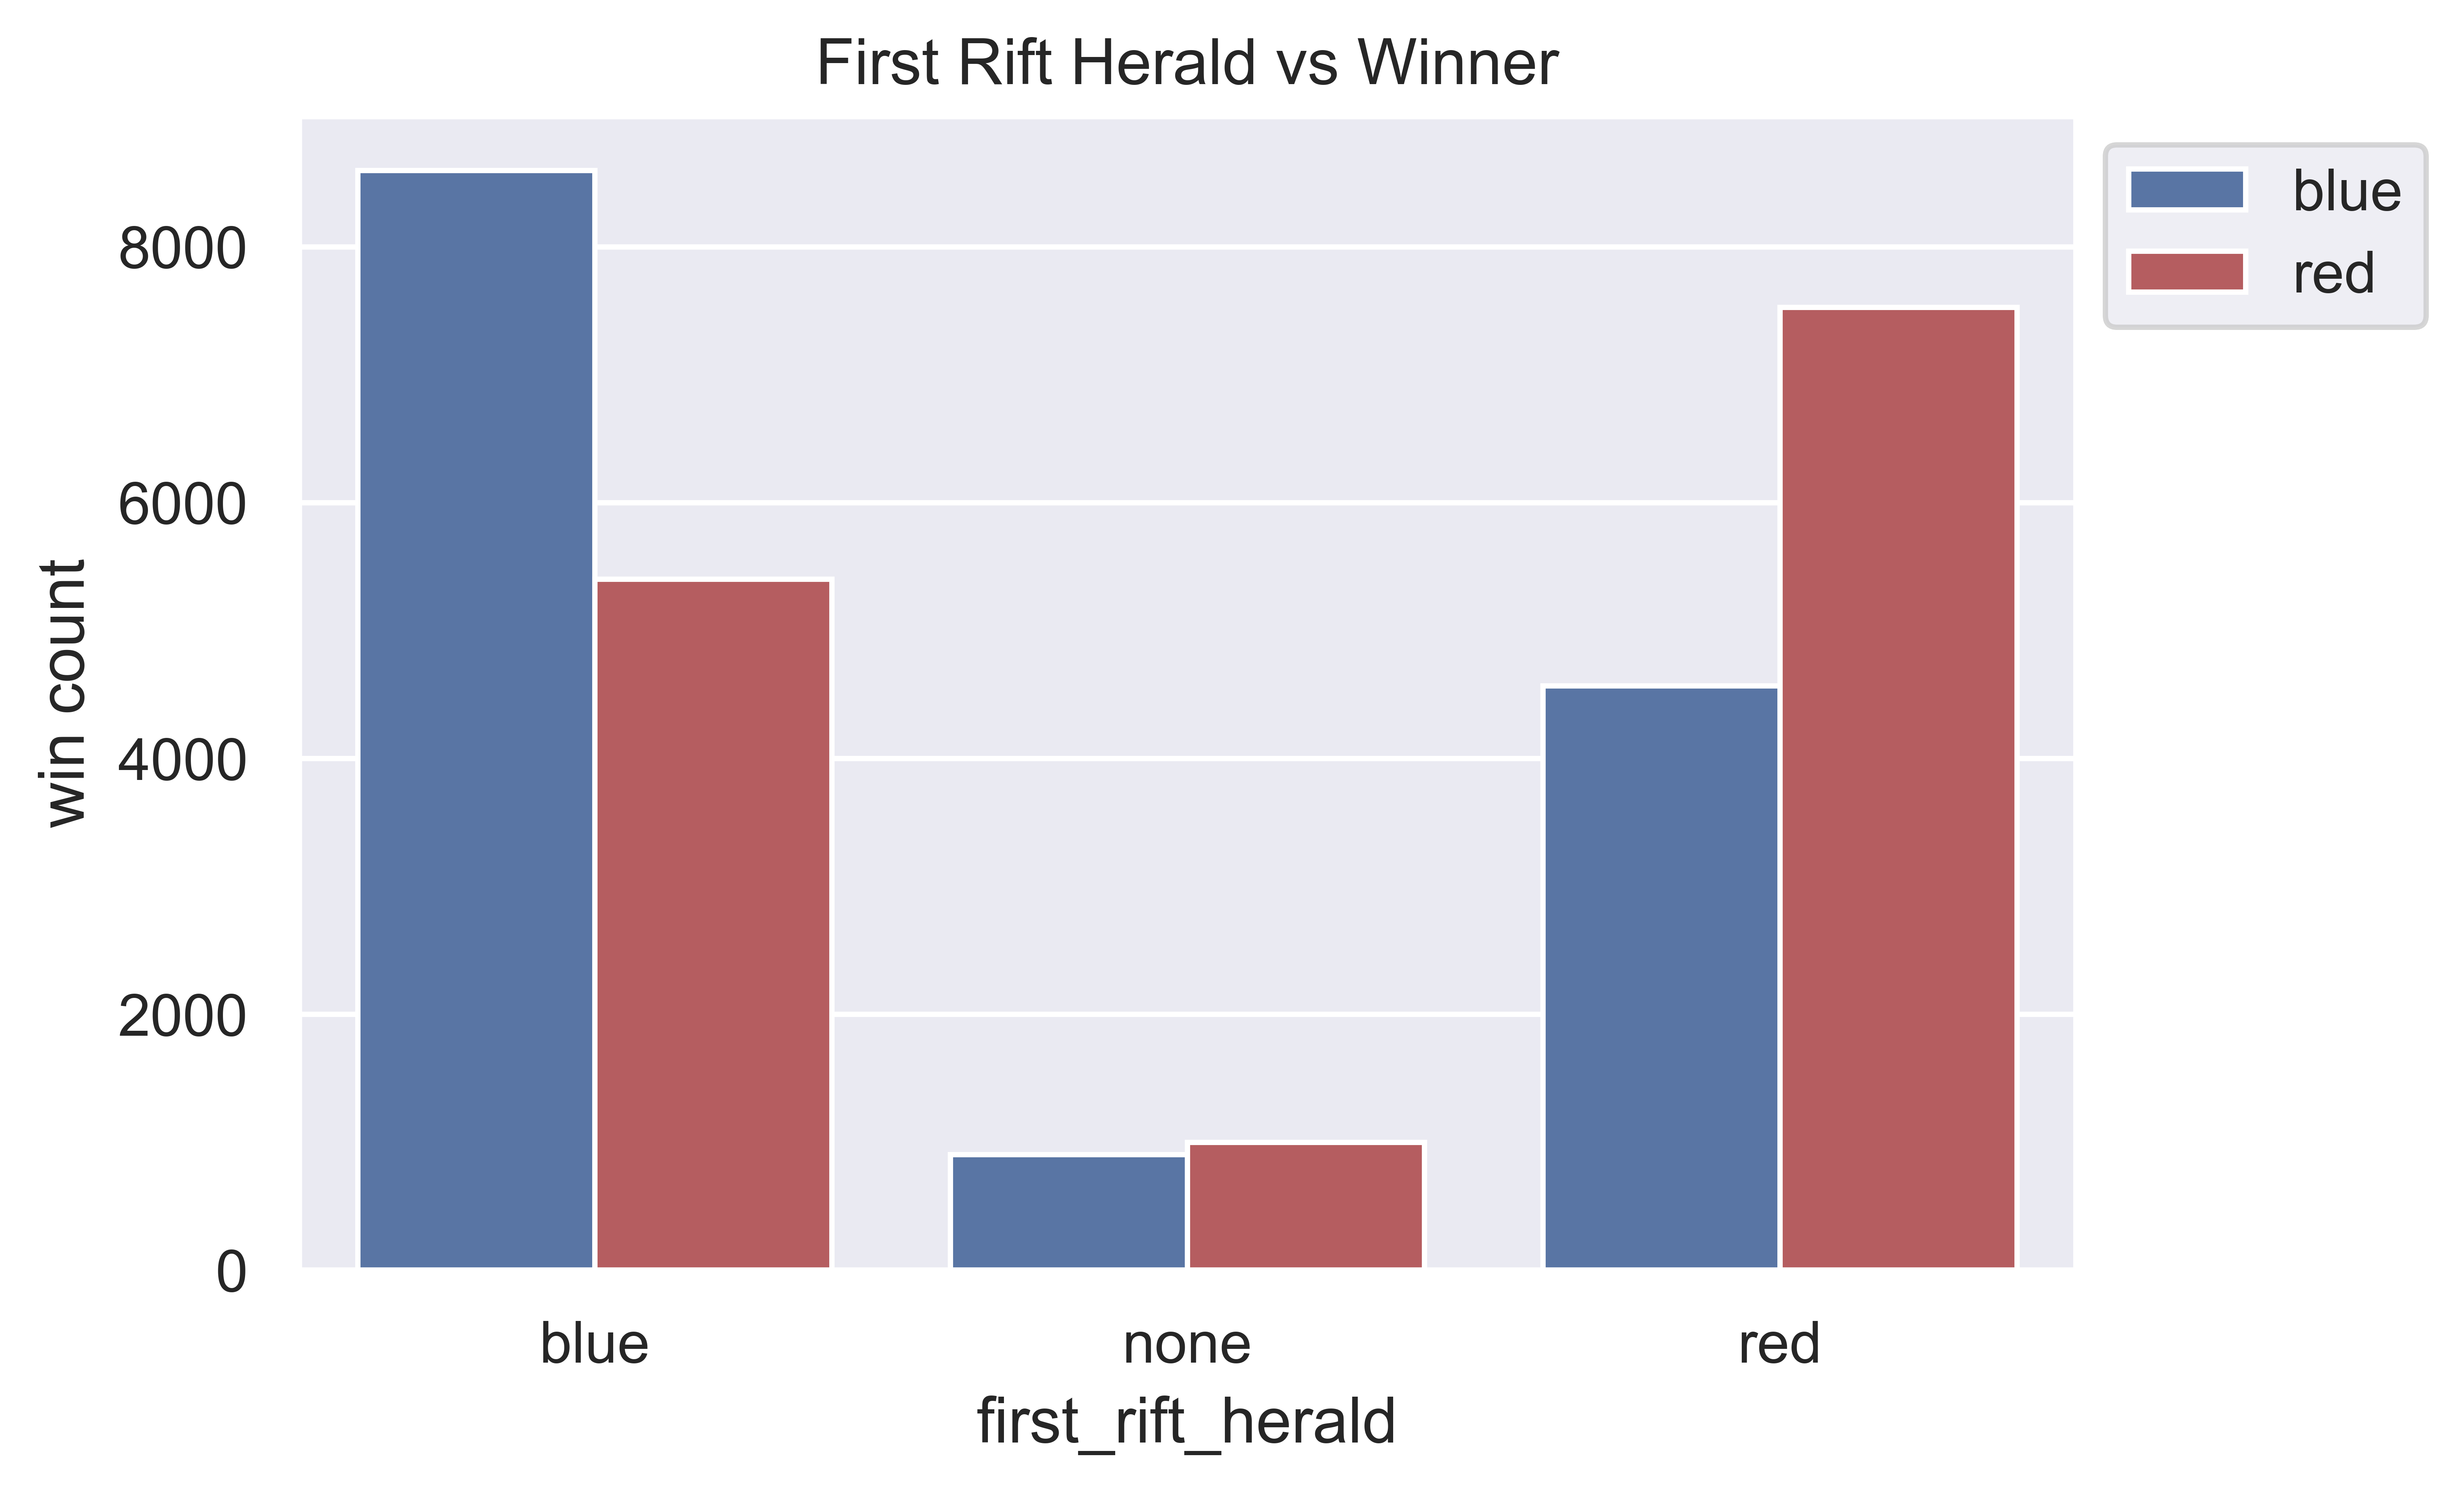

In [141]:
plt.figure(dpi=1000)
p = sns.countplot(x='first_rift_herald', hue='winner', data=df.replace({-1:'blue', 0:'none', 1:'red'}),
                  order=['blue', 'none', 'red'], palette=['b', 'r'])
plt.title('First Rift Herald vs Winner')
plt.ylabel('win count')
plt.legend(bbox_to_anchor = (1.0, 1.0), loc='upper left')
plt.show(p)